In [1]:
"""
Created on Mon Aug 13 10:22:48 2018

@author: Farhad

- Time Series Analysis in Python: An Introduction

- https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
- https://research.fb.com/prophet-forecasting-at-scale/
- https://github.com/WillKoehrsen/Data-Analysis/tree/master/additive_models

"""
"""
it is about Addative model 

- financial time-series data using Python and the Prophet forecasting 
   package developed by Facebook.
   
   
_ pakages that are used here are:
    1. pandas, dataframe
    2. quandl, get data and api
    3. matplotlib , drawing plot
    4. fbprophet, for forcasting. this pakage is evloved by facbook reascher group for forcasting time series
"""


'\nit is about Addative model \n\n- financial time-series data using Python and the Prophet forecasting \n   package developed by Facebook.\n   \n   \n_ pakages that are used here are:\n    1. pandas, dataframe\n    2. quandl, get data and api\n    3. matplotlib , drawing plot\n    4. \n'

In [183]:
import quandl 
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
#----------------------
import fbprophet 

#-----------------------
%matplotlib inline

In [184]:
quandl.ApiConfig.api_key = 'QEx1tGbLj785wTqEwEzz'
# Retrieve TSLA data and the GM data from Quandl
tesla = quandl.get('WIKI/TSLA')
gm = quandl.get('WIKI/GM')
tesla.to_csv("data/TESlA")
gm.to_csv("data/GM")

#gm.head(5)
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [180]:
gm = pd.read_csv("data/GM")
tesla = pd.read_csv('data/TESLA')

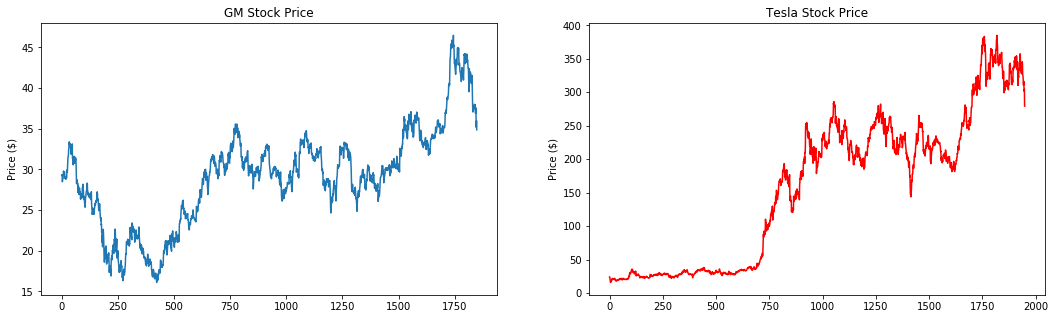

In [181]:
# The adjusted close accounts for stock splits, so that is what we should graph

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)');

plt.subplot(122)
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)');
plt.show();


<h3> Comparing the two companies on stock prices alone does not show which is more valuable
because the total value of a company (market capitalization) also depends on the number 
of shares (Market cap= share price * number of shares). </h3>
<h3 style="color:#A53030;">Market cap = share price * number of shares</h3>


<h3>  create a column of market cap:</h3> 

In [7]:
# Yearly average number of shares outstanding for Tesla and GM::
# it is came out by seraching on google,,
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 
                2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}

gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 
             2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

In [185]:
# <h2> Create a year column </h2>
tesla['Year'] = tesla.index.year
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year
Date,,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010


In [179]:
# Take Dates from index and move to Date column :::
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0
tesla.head()

,index,ds,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,y,cap
0,0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010,1.21839,0
1,1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010,1.21533,0
2,2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010,1.11996,0
3,3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010,0.97920,0
4,4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010,0.82161,0


In [10]:
# Calculate market cap for all years::
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.ix[i, 'cap'] = shares * tesla.ix[i, 'Adj. Close']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [11]:
gm['Year'] = gm.index.year
#gm.head()
# Take Dates from index and move to Date column :::(for GM) 
gm.reset_index(level=0, inplace = True)
gm['cap'] = 0
#gm.head()


# Calculate market cap for all years::(for GM) 

for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.ix[i, 'cap'] = shares * gm.ix[i, 'Adj. Close']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [111]:
gm.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0,2010,4.394145e+10
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0,2010,4.403142e+10
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0,2010,4.380008e+10
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0,2010,4.273335e+10
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0,2010,4.302895e+10


In [12]:
# Merge the two datasets and rename the columns
cars = gm.merge(tesla, how='inner', on='Date') # give gm pastName_x and give tesla pastName_y
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)


In [121]:
cars.head()

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,...,Volume_y,Ex-Dividend_y,Split Ratio_y,Adj. Open_y,Adj. High_y,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Year_y,tesla_cap
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,...,956100.0,0.0,1.0,30.67,30.74,28.9201,29.89,956100.0,2010,1.524390e+09
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,...,1150500.0,0.0,1.0,30.16,31.37,29.7000,30.99,1150500.0,2010,1.580490e+09
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,...,1529700.0,0.0,1.0,31.57,33.45,31.5000,33.40,1529700.0,2010,1.703400e+09
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,...,1577800.0,0.0,1.0,33.29,35.68,32.1901,34.57,1577800.0,2010,1.763070e+09
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,...,1425000.0,0.0,1.0,35.27,35.97,34.3340,35.47,1425000.0,2010,1.808970e+09


In [108]:
#help(gm.merge)

In [13]:
# Select only the relevant columns
cars = cars.ix[:, ['Date', 'gm_cap', 'tesla_cap']] 
#change datafarme and take just three column (Dimension reduction)

# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

cars.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


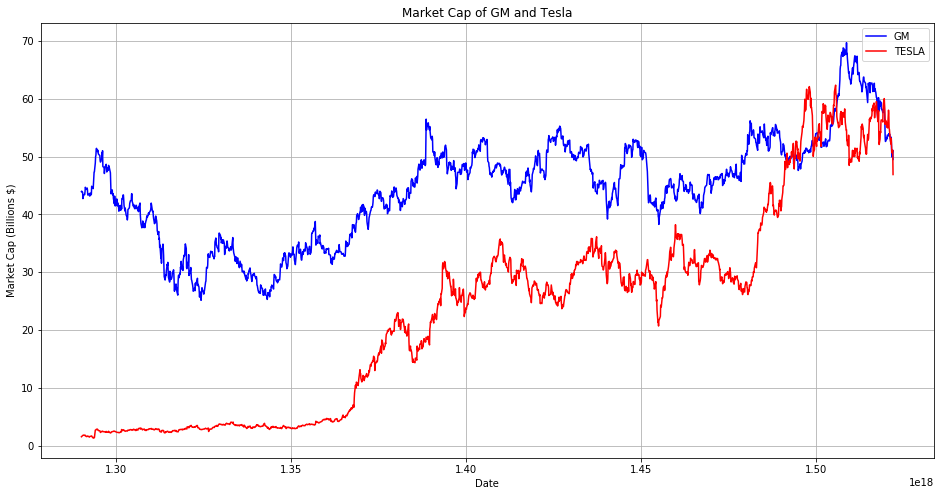

In [20]:
# Now,  we can camparied them easy..
plt.figure(figsize=(16, 8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label = 'GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label = 'TESLA')
plt.xlabel('Date'); plt.ylabel('Market Cap (Billions $)'); plt.title('Market Cap of GM and Tesla')
#plt.xticks(cars['Date'])
plt.grid()
plt.legend()

In [27]:
# Find the first and last time Tesla was valued higher than GM::

first_date = cars.ix[np.min(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']
last_date = cars.ix[np.max(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']
print("Tesla was valued higher than GM from {} to {}.".format(first_date.date(), last_date.date()))

Tesla was valued higher than GM from 2017-04-10 to 2018-03-23.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


[array([1607, 1608, 1610, 1616, 1617, 1620, 1621, 1622, 1623, 1625, 1627,
       1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638,
       1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649,
       1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660,
       1661, 1662, 1663, 1664, 1665, 1666, 1670, 1671, 1679, 1680, 1681,
       1682, 1683, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693,
       1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704,
       1705, 1706, 1707, 1708, 1709, 1711, 1712, 1713, 1714, 1715, 1716,
       1717, 1718, 1719, 1720, 1721, 1825, 1826, 1827, 1828, 1829, 1830,
       1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
       1842, 1845, 1846])]


<h3>During that period, Tesla sold about 48,000 cars while GM sold 1,500,000. GM was valued less than Tesla during a period in which it sold 30 times more cars!</h3>

<h2 style="color:#972525;"> Although the value of Tesla is now lower than GM, a good question might be, can we expect Tesla to again surpass GM? When will this happen? For that we turn to additive models for forecasting, or in other words, predicting the future. </h2>

<h1 style="color:#143DB0"> Modeling with Prophet </h1>

- Prophet is designed for analyzing time series with daily observations that display patterns on different time scales.
- It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints, 

In [126]:
#!pip install fbprophet

In [31]:
# https://research.fb.com/prophet-forecasting-at-scale/
import fbprophet

We first import prophet and rename the columns in our data to the correct format. The Date column must be called ‘ds’ and the value column we want to predict ‘y’. We then create prophet models and fit them to the data, much like a Scikit-Learn machine learning model:

In [30]:
# Prophet requires columns ds (Date) and y (value)
gm = gm.rename(columns={'Date': 'ds', 'cap': 'y'})

# Put market cap in billions
gm['y'] = gm['y'] / 1e9

# Make the prophet model and fit on the data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(gm)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [31]:
tesla = tesla.rename(columns={'Date': 'ds', 'cap': 'y'})
tesla['y'] = tesla['y']/1e9
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
tesla_prophet.fit(tesla)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


-  I set the changepoint prior to 0.15, up from the default value of 0.05. This hyperparameter is used to control how sensitive the trend is to changes,
-  This value is used to combat one of the most fundamental trade-offs in machine learning: bias vs. variance.
- In the call to create a prophet model, we can also specify changepoints,
- The higher the changepoint prior scale, the more flexible the model and the closer it fits to the training data.

<h3 style='color:blue'>To make forecasts, we need to create what is called a future dataframe. We specify the number of future periods to predict (two years) and the frequency of predictions (daily). We then make predictions with the prophet model we created and the future dataframe: </h3>

In [32]:
# Make a future dataframe for 2 years
gm_forecast = gm_prophet.make_future_dataframe(periods=365 * 2, freq='D')

# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

In [34]:
tesla_forecast = tesla_prophet.make_future_dataframe(periods=365 * 2, freq='D')
tesla_forecast = tesla_prophet.predict(tesla_forecast)

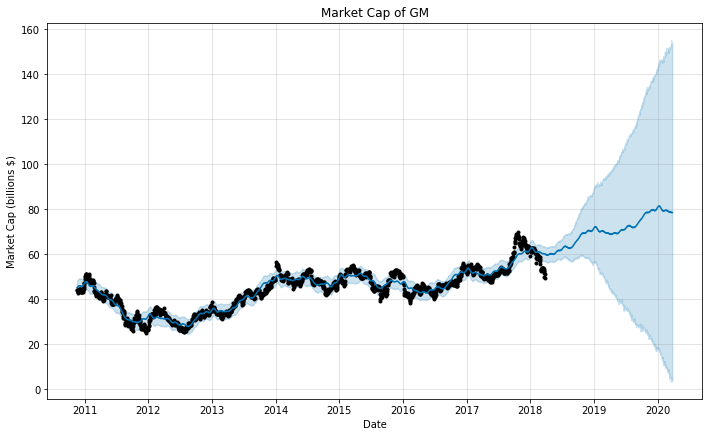

In [43]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of GM');

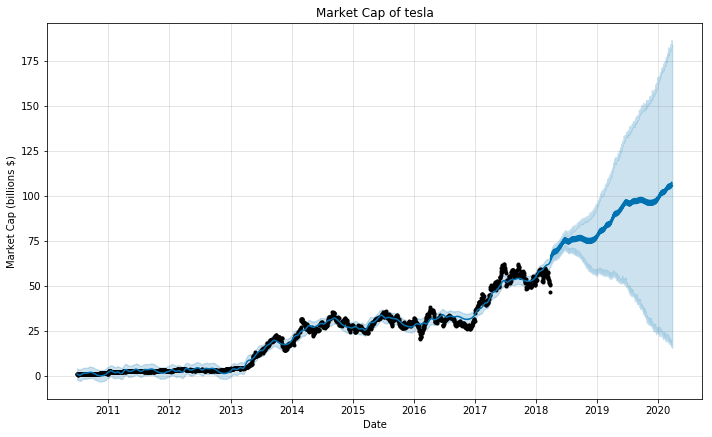

In [44]:
tesla_prophet.plot(tesla_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of tesla');

In [ ]:
# Create the plot
plt.figure(figsize=(10, 8))

# Actual observations
plt.plot(tesla['ds'], tesla['y'], 'ko', label = 'Observations')
colors = {0.001: 'b', 0.05: 'r', 0.1: 'grey', 0.5: 'gold'}

# Plot each of the changepoint predictions
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(tesla['ds'], tesla[changepoint], color = colors[changepoint], label = '%.3f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Market Cap (billions $)'); plt.title('Effect of Changepoint Prior Scale');

<div style="color:black">
- The black dots represent the actual values
    </div><div style="color:blue">
- the blue line indicates the forecasted values, 
    </div><div style="color:#1966FF">
- the light blue shaded region is the uncertainty
        </div>

<h2 style="color:red"> identified change-points: </h2>

In [47]:
gm_prophet.changepoints[:10]

59    2011-02-14
118   2011-05-10
177   2011-08-03
236   2011-10-26
296   2012-01-24
355   2012-04-18
414   2012-07-12
473   2012-10-04
532   2013-01-02
591   2013-03-28
Name: ds, dtype: datetime64[ns]

In [48]:
tesla_prophet.changepoints[:10]

62    2010-09-27
125   2010-12-27
187   2011-03-25
249   2011-06-23
312   2011-09-22
374   2011-12-20
436   2012-03-21
499   2012-06-20
561   2012-09-18
623   2012-12-18
Name: ds, dtype: datetime64[ns]

In [313]:
tesla_search = pd.read_csv('data/multiTimeline.csv')
tesla_search.head()

,Week;Tesla
0,05/09/2010;42
1,12/09/2010;62
2,19/09/2010;41
3,26/09/2010;19
4,03/10/2010;100


In [314]:


tesla_search = tesla_search['Week;Tesla'].str.split(';', n=1, expand=True)

tesla_search.columns = ["Date",'Search']

tesla_search.head()

,Date,Search
0,05/09/2010,42
1,12/09/2010,62
2,19/09/2010,41
3,26/09/2010,19
4,03/10/2010,100


In [315]:
tesla_search.to_csv('data/Workbook2.csv')

In [316]:
tesla_search = pd.read_csv('data/Workbook2.csv')

tesla_search.tail()

,Unnamed: 0,Date,Search
117,117,02/12/2012,53
118,118,09/12/2012,38
119,119,16/12/2012,90
120,120,23/12/2012,61
121,121,30/12/2012,67


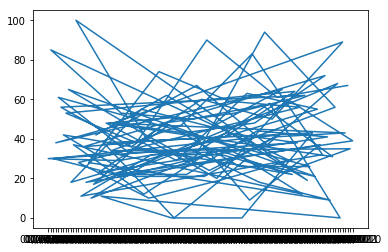

In [317]:
x = tesla_search['Date']
y = tesla_search['Search']
plt.plot(x,y)
plt.show()

In [318]:
tesla_search['Date'] = pd.to_datetime(tesla_search['Date'])
#tesla_search.index = tesla_search['Date']
tesla_search.tail()

,Unnamed: 0,Date,Search
117,117,2012-02-12,53
118,118,2012-09-12,38
119,119,2012-12-16,90
120,120,2012-12-23,61
121,121,2012-12-30,67


In [319]:
tesla_search = tesla_search.sort_values(by='Date')

In [320]:
tesla_search.index = tesla_search['Date']
tesla_search.head()

,Unnamed: 0,Date,Search
Date,,,
2010-03-10,4,2010-03-10,100
2010-05-09,0,2010-05-09,42
2010-05-12,13,2010-05-12,23
2010-07-11,9,2010-07-11,22
2010-09-19,2,2010-09-19,41


In [321]:

tesla_search['Month'] = tesla_search.index.month
#del tesla_search['Date']

tesla_search.head()

,Unnamed: 0,Date,Search,Month
Date,,,,
2010-03-10,4,2010-03-10,100,3
2010-05-09,0,2010-05-09,42,5
2010-05-12,13,2010-05-12,23,5
2010-07-11,9,2010-07-11,22,7
2010-09-19,2,2010-09-19,41,9


In [322]:
tesla_search['Search'] = tesla_search['Search'].astype('int64')

In [323]:
tesla_search1 = tesla_search['Search'].groupby(pd.TimeGrouper('M')).sum(axis=0)
tesla_search1.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


Date
2010-03-31    100.0
2010-04-30      NaN
2010-05-31     65.0
2010-06-30      NaN
2010-07-31     22.0
Freq: M, Name: Search, dtype: float64

In [325]:
tesla_search1 = tesla_search1.dropna()

tesla_search1.head()

Date
2010-03-31    100.0
2010-05-31     65.0
2010-07-31     22.0
2010-09-30     60.0
2010-10-31    159.0
Name: Search, dtype: float64

In [330]:
tesla_search2 = pd.DataFrame()
tesla_search2['Search'] = tesla_search1[:]
tesla_search2['Date'] = tesla_search1.index
tesla_search2.head()

,Search,Date
Date,,
2010-03-31 00:00:00,100,2010-03-31 00:00:00
2010-05-31 00:00:00,65,2010-05-31 00:00:00
2010-07-31 00:00:00,22,2010-07-31 00:00:00
2010-09-30 00:00:00,60,2010-09-30 00:00:00
2010-10-31 00:00:00,159,2010-10-31 00:00:00


In [341]:
#l = np.where(tesla_search1['Month'].isnull())[0]
#for i in l :
#    print (i)
#    print(tesla_search1.loc[1,'Month'] )#= tesla_search1.loc[i-1,'Month']


AttributeError: 'str' object has no attribute 'toordinal'

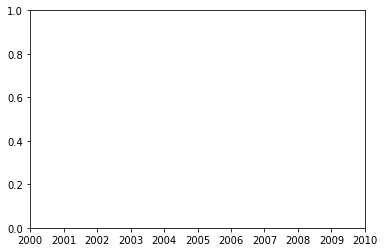

In [332]:
# Load in the data 
#tesla_search = pd.read_csv('data/Workbook2.csv')
# Convert month to a datetime

#tesla_search1['Date'] = pd.to_datetime(tesla_search['Date'])
#tesla_search['Month'] = pd.to_datetime(tesla_search['Week'])
tesla_changepoints = [str(date) for date in tesla_prophet.changepoints]
# Plot the search frequency
plt.plot(tesla_search2['Date'], tesla_search2['Search'], label = 'Searches')
# Plot the changepoints
plt.vlines(tesla_changepoints, ymin = 0, ymax= 100, colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')
# Formatting of plot
plt.grid('off'); plt.ylabel('Relative Search Freq'); plt.legend()
plt.title('Tesla Search Terms and Changepoints');



In [342]:
gm_names = ['gm_%s' % column for column in gm_forecast.columns]
tesla_names = ['tesla_%s' % column for column in tesla_forecast.columns]
# Dataframes to merge
merge_gm_forecast = gm_forecast.copy()
merge_tesla_forecast = tesla_forecast.copy()
# Rename the columns
merge_gm_forecast.columns = gm_names
merge_tesla_forecast.columns = tesla_names
# Merge the two datasets
forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how = 'inner', left_on = 'gm_ds', right_on = 'tesla_ds')
# Rename date column
forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)

In [344]:
# Merge the two datasets
forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how = 'inner', left_on = 'gm_ds', right_on = 'tesla_ds')

# Rename date column
forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)
forecast.head()

,Date,gm_trend,gm_trend_lower,gm_trend_upper,gm_yhat_lower,gm_yhat_upper,gm_additive_terms,gm_additive_terms_lower,gm_additive_terms_upper,gm_multiplicative_terms,...,tesla_multiplicative_terms,tesla_multiplicative_terms_lower,tesla_multiplicative_terms_upper,tesla_weekly,tesla_weekly_lower,tesla_weekly_upper,tesla_yearly,tesla_yearly_lower,tesla_yearly_upper,tesla_yhat
0,2010-11-18,42.615585,42.615585,42.615585,42.031221,48.301288,2.531744,2.531744,2.531744,0.0,...,0.0,0.0,0.0,-0.796319,-0.796319,-0.796319,-3.996821,-3.996821,-3.996821,0.089587
1,2010-11-19,42.645313,42.645313,42.645313,42.025631,48.415920,2.528945,2.528945,2.528945,0.0,...,0.0,0.0,0.0,-0.818898,-0.818898,-0.818898,-4.049694,-4.049694,-4.049694,0.066626
2,2010-11-22,42.734498,42.734498,42.734498,42.016992,48.721886,2.731987,2.731987,2.731987,0.0,...,0.0,0.0,0.0,-0.753860,-0.753860,-0.753860,-4.198914,-4.198914,-4.198914,0.139917
3,2010-11-23,42.764227,42.764227,42.764227,42.427484,48.563023,2.729761,2.729761,2.729761,0.0,...,0.0,0.0,0.0,-0.762258,-0.762258,-0.762258,-4.245204,-4.245204,-4.245204,0.137721
4,2010-11-24,42.793955,42.793955,42.793955,42.549966,48.774893,2.859735,2.859735,2.859735,0.0,...,0.0,0.0,0.0,-0.734442,-0.734442,-0.734442,-4.289615,-4.289615,-4.289615,0.173618


# Visualize Trend Only and the Forecast

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_trend'], 'b-')
plt.plot(forecast['Date'], forecast['tesla_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap ($)')
plt.title('GM vs. Tesla Trend');

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['tesla_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap (billions $)')
plt.title('GM vs. Tesla Estimate');

In [ ]:
overtake_date = min(forecast.ix[forecast['tesla_yhat'] > forecast['gm_yhat'], 'Date'])
print('Tesla overtakes GM on {}'.format(overtake_date))

# Forecast with Uncertainty Bounds

In [345]:
# Only keep years 2011 onwards and from before 2020
forecast = forecast[forecast['Date'] > '2010-12-31']
forecast = forecast[forecast['Date'] < '2020-01-01']

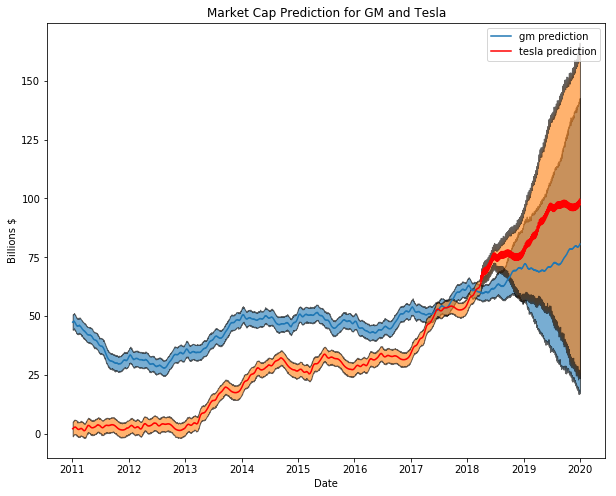

In [346]:
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 8));

# Plot estimate
ax.plot(forecast['Date'], forecast['gm_yhat'], label = 'gm prediction');

# Plot uncertainty values
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['gm_yhat_upper'], forecast['gm_yhat_lower'], alpha=0.6, edgecolor = 'k');

# Plot estimate and uncertainty for tesla
ax.plot(forecast['Date'], forecast['tesla_yhat'], 'r', label = 'tesla prediction');
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['tesla_yhat_upper'], forecast['tesla_yhat_lower'], alpha=0.6, edgecolor = 'k');
plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions $'); plt.title('Market Cap Prediction for GM and Tesla');


<h1> Trends and Patterns: </h1>
<h4> The last step of the market capitalization analysis is looking at the overall trend and patterns. Prophet allows us to easily visualize the overall trend and the component patterns: </h4>

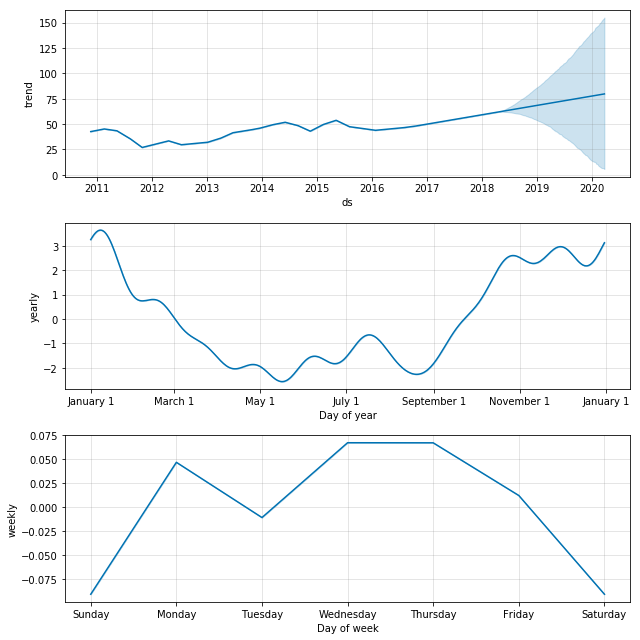

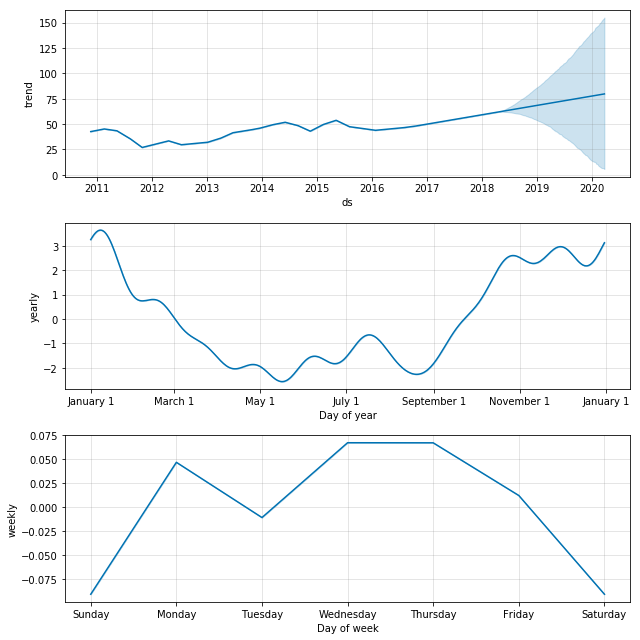

In [347]:
# Plot the trends and patterns
gm_prophet.plot_components(gm_forecast)

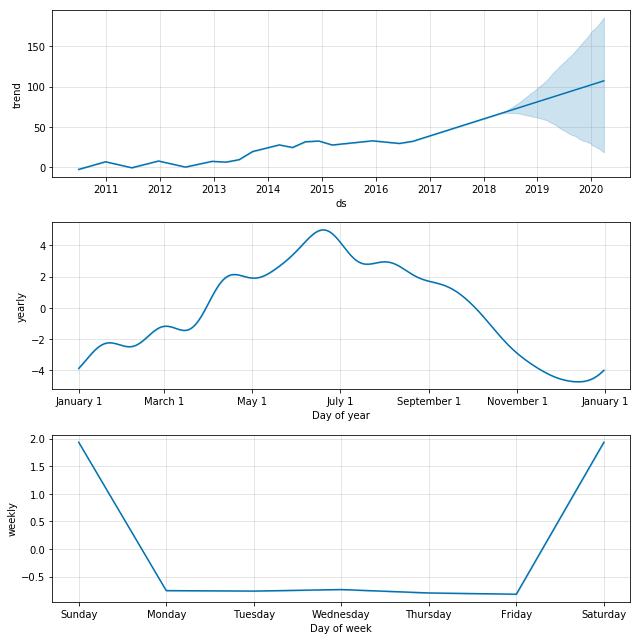

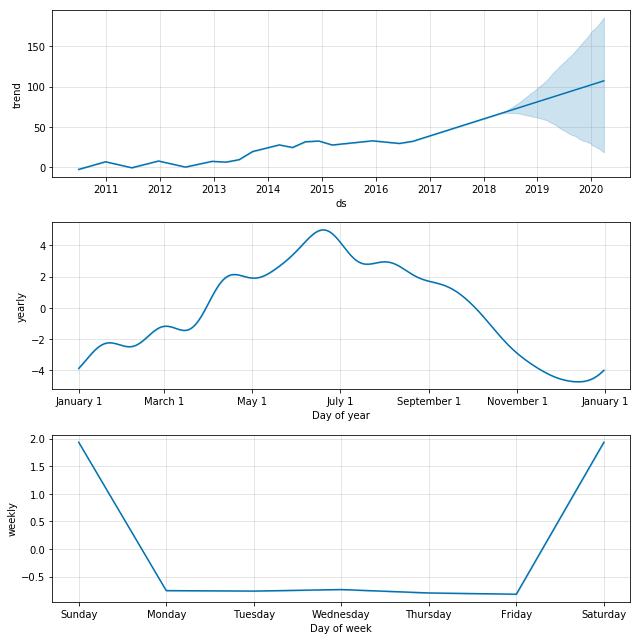

In [348]:
# Plot the trends and patterns
tesla_prophet.plot_components(tesla_forecast)

In [ ]:
# Read in the sales data
gm_sales = pd.read_csv('data/gm_sales.csv')
gm_sales.head(5)

In [ ]:
# Melt the sales data and rename columns
gm_sales = gm_sales.melt(id_vars='Year', var_name = 'Month', value_name = 'Sales')
gm_sales.head(8)

In [ ]:
# Format the data for plotting
gm_sales = gm_sales[gm_sales['Month'] != 'Total']
gm_sales = gm_sales[gm_sales['Year'] > 2010]
gm_sales['Date'] = ['-'.join([str(year), month]) for year, month in zip(gm_sales['Year'], gm_sales['Month'])]
gm_sales['Date'] = pd.to_datetime(gm_sales['Date'], format = "%Y-%b")
gm_sales.sort_values(by = 'Date', inplace=True)
gm_sales['Month'] = [date.month for date in gm_sales['Date']]

# Plot the sales over the period
plt.plot(gm_sales['Date'], gm_sales['Sales'], 'r');
plt.title('GM Monthly Sales 2011-2017'); plt.ylabel('Sales');

In [349]:
gm_sales_grouped = gm_sales.groupby('Month').mean()
plt.plot(list(range(1, 13)), gm_sales_grouped['Sales']);
plt.xlabel('Month'); plt.ylabel('Sales'); plt.title('GM Average Monthly Sales 2011-2017');


NameError: name 'gm_sales' is not defined

In [ ]:
gm_prophet.plot_yearly(); plt.title('GM Yearly Component of Market Cap');